# A project on Heart Deasease Prediction solved by KNeighbors and RandomForest Algorithms (cross validation is also used)

In [147]:
#import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [148]:
#importing data and
df=pd.read_csv('C:\\Users\\AKASH pc\\Downloads\\Predicting-Heart-Disease-master\\Predicting-Heart-Disease-master\\dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [149]:
#Checking the balance of the target varibles
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [150]:
#checking shape of the dataframe
df.shape

(303, 14)

In [151]:
#information of the dataframe
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


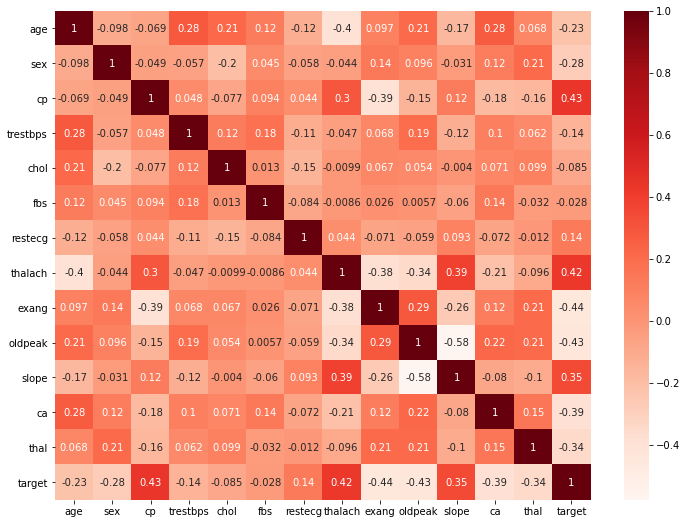

In [152]:
#checking the correlation between features
import seaborn as sb
plt.figure(figsize=(12,9))
sb.heatmap(df.corr(),annot=True,cmap='Reds')

In [153]:
#Transforming categorical features to dummy features/numerical features
data=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'],drop_first=True)

In [154]:
#feature scaling the features
scaler=StandardScaler()
col=['age','trestbps','chol','thalach','oldpeak']
data[col]=scaler.fit_transform(data[col])

In [155]:
#dividing the data into target varibales and predictor variables
X=data.drop('target',axis=1)
y=data.target

In [156]:
#doing spliting of data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

### 1.Using K-Nearest Neighbors Classification Algo

In [157]:
#using simple knn to predict the accuracy for now
kn=KNeighborsClassifier()
kn_fit=kn.fit(X_train,y_train)
y_pred=kn_fit.predict(X_test)
accuracy_score(y_test,y_pred)

0.8021978021978022


#### Using Cross Validation to get the best n_neighbors value

In [158]:
#importing and using cross val score
from sklearn.model_selection import cross_val_score
knn_score=[]
for i in range(1,20):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn_classifier,X_train,y_train,cv=3)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

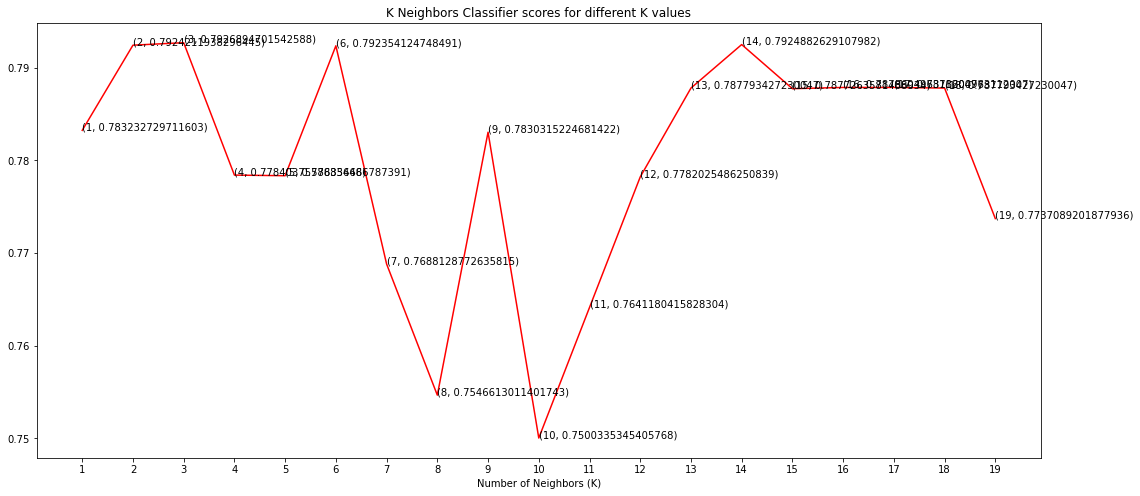

In [159]:
#plotting the cross validation score graphically to make it more clear
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
for i in range(1,20):
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
plt.plot([i for i in range(1,20)],knn_score,c='r')
plt.xticks([i for i in range(1,20)]);
plt.xlabel('Number of Neighbors (K)')
plt.title('K Neighbors Classifier scores for different K values')

            By looking at the chart it is clear that 14 will be right K_neighbor value
        

In [160]:
#again fitting the training data and getting the accuracy
kn=KNeighborsClassifier(n_neighbors=14)
kn_fit=kn.fit(X_train,y_train)
y_pred=kn_fit.predict(X_test)
accuracy_score(y_pred,y_test)

0.8021978021978022

We have got a decent accuracy and now let's check the accuracy in Random Forest

### 2. Using Random Forest Classification

In [161]:
#fitting and predicted training data
rfc=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [162]:
#getting the accuracy
accuracy_score(y_test,y_pred)

0.7692307692307693

        We have got a decent accuracy here too, But accuracy in KNN is greater than this
                            Thank you!